<a href="https://colab.research.google.com/github/vanamalamanish/Face_Recognition/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Done with encoding


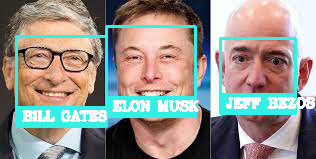

In [25]:
#This is face Recognition project in Google Colab
#For This is project You need to go to colab and install face_recognition module
#The following is the command to install required library
#!pip install face_recognition
import face_recognition
import os
import cv2
import numpy as np
#In colab we cannot direct use cv2.imshow() method instead we have to use cv2_imshow() which is present in google.colab.patches
#so we have to import following cv2_show()
from google.colab.patches import cv2_imshow

#First we have to create a variable for path so we can use it for looping Known face encoding
path="/content/img/Known"
images=[] # creating an empty list for storing Known images
Person_names=[] #creating an empty list for holding the names of the person in Image
mylist=os.listdir(path) #creating a list to store the images names
#The following code is to add image and name to images and Person_names list respectively...
for i in mylist:
  curimg=cv2.imread(f'{path}/{i}')
  images.append(curimg)
  Person_names.append(os.path.splitext(i)[0])#here we are taking the only name from the image name

#we are creating a function called findEncoding this function evaluates the Encodings of the Known images and returns the encodingList
def findEncoding(images):
  encodingList=[]
  for img in images:
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)# converting the image to BGR 
    encode=face_recognition.face_encodings(img)[0]
    encodingList.append(encode)
  return(encodingList)

#creating a list for storing the encoded image list
encodeListKnown = findEncoding(images)
print("Done with encoding")
testImage=face_recognition.load_image_file("/content/img/Unknown/All of them.jpg") # loading the test image
testfaceLocations=face_recognition.face_locations(testImage) # finding the locations of faces in the test image
testEncodings=face_recognition.face_encodings(testImage) #finding the encoding of faces in the test image
#iterating over each and every face (locations and encoding)  
#face location  consists of four boundries top , bottom , left , right so we are unpacking storing in respective variables 
#zip function returns the iterator of tuples based on the iterable object
#If multiple iterables are passed, zip() returns an iterator of tuples with each tuple having elements from all the iterables. 
for (top,right,bottom,left),testEncoding in zip(testfaceLocations,testEncodings): 
  matches = face_recognition.compare_faces(encodeListKnown,testEncoding,tolerance=0.6) # comparing the face in the test image with known image using the encoding value.
  facedist= face_recognition.face_distance(encodeListKnown,testEncoding) # It is finding the face distance between face in the test image with known image using the encoding value..
  matchindex = np.argmin(facedist) # finding the index of minimum face distance from the facedist
  name ="Unkown"
  if matches[matchindex]: # getting the name from the person_name list
     name=Person_names[matchindex].upper()
  cv2.rectangle(testImage,(left,top),(right,bottom),(50,240,230),2)# creating a box around the face 
  cv2.rectangle(testImage,(left,bottom-20),(right,bottom),(50,240,230),cv2.FILLED)# creating a box just down of the above box so that we can put the name of the person 
  cv2.putText(testImage,name,(left+6,bottom-6),cv2.FONT_HERSHEY_COMPLEX,0.45,(255,255,255),2)# printing the name inside th box
testImage=cv2.cvtColor(testImage, cv2.COLOR_RGB2BGR)#converting the test image back to RGB
cv2_imshow(testImage)#showing the testImage

In [30]:
!pip install dlib

In [37]:
!pip list

Package                       Version       
----------------------------- --------------
absl-py                       0.12.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
arviz                         0.11.2        
astor                         0.8.1         
astropy                       4.2.1         
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.6         
atomicwrites                  1.4.0         
attrs                         21.2.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.1         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis      